In [2]:
from importlib import reload
import src.decks
import src.saving
reload(src.saving);
reload(src.decks);
from src.parser import Parser
from src.heatmaps import make_heatmap
reload(src.heatmaps);
from src.decks import Deck, deckGen, loadDeck
import numpy as np
from textwrap import wrap
import pandas as pd
from itertools import permutations

In [2]:
from typing import Literal

In [ ]:
#y = deckGen(numDecks=40000, chunkSize=10000, filename='decktest_deck4')

In [7]:
y = loadDeck('data/decktest_decks')
w = Parser(y, bits=3)
res = w.rawOut()

In [8]:
res

[('110', '100', array([38292,  1380,   328])),
 ('110', '111', array([20391, 18852,   757])),
 ('110', '001', array([19096, 18993,  1911])),
 ('110', '000', array([39534,   372,    94])),
 ('110', '101', array([34420,  5032,   548])),
 ('110', '011', array([   79, 39904,    17])),
 ('110', '010', array([36713,  2702,   585])),
 ('100', '110', array([ 1380, 38292,   328])),
 ('100', '111', array([32020,  7160,   820])),
 ('100', '001', array([39886,    92,    22])),
 ('100', '000', array([39998,     1,     1])),
 ('100', '101', array([19443, 19480,  1077])),
 ('100', '011', array([19406, 19404,  1190])),
 ('100', '010', array([22339, 16791,   870])),
 ('111', '110', array([18852, 20391,   757])),
 ('111', '100', array([ 7160, 32020,   820])),
 ('111', '001', array([  379, 39504,   117])),
 ('111', '000', array([19398, 19422,  1180])),
 ('111', '101', array([10947, 28356,   697])),
 ('111', '011', array([    1, 39999,     0])),
 ('111', '010', array([10162, 29023,   815])),
 ('001', '110

[('011', '111', [np.int64(40000), np.int64(0), np.int64(0)]), ('011', '001', [np.int64(1433), np.int64(38244), np.int64(323)]), ('011', '100', [np.int64(19421), np.int64(19447), np.int64(1132)]), ('011', '000', [np.int64(32056), np.int64(7142), np.int64(802)]), ('011', '101', [np.int64(22291), np.int64(16791), np.int64(918)]), ('011', '110', [np.int64(39900), np.int64(83), np.int64(17)]), ('011', '010', [np.int64(19433), np.int64(19362), np.int64(1205)]), ('111', '011', [np.int64(0), np.int64(40000), np.int64(0)]), ('111', '001', [np.int64(385), np.int64(39484), np.int64(131)]), ('111', '100', [np.int64(7113), np.int64(32062), np.int64(825)]), ('111', '000', [np.int64(19446), np.int64(19393), np.int64(1161)]), ('111', '101', [np.int64(11014), np.int64(28339), np.int64(647)]), ('111', '110', [np.int64(18888), np.int64(20301), np.int64(811)]), ('111', '010', [np.int64(10131), np.int64(29043), np.int64(826)]), ('001', '011', [np.int64(38244), np.int64(1433), np.int64(323)]), ('001', '111'

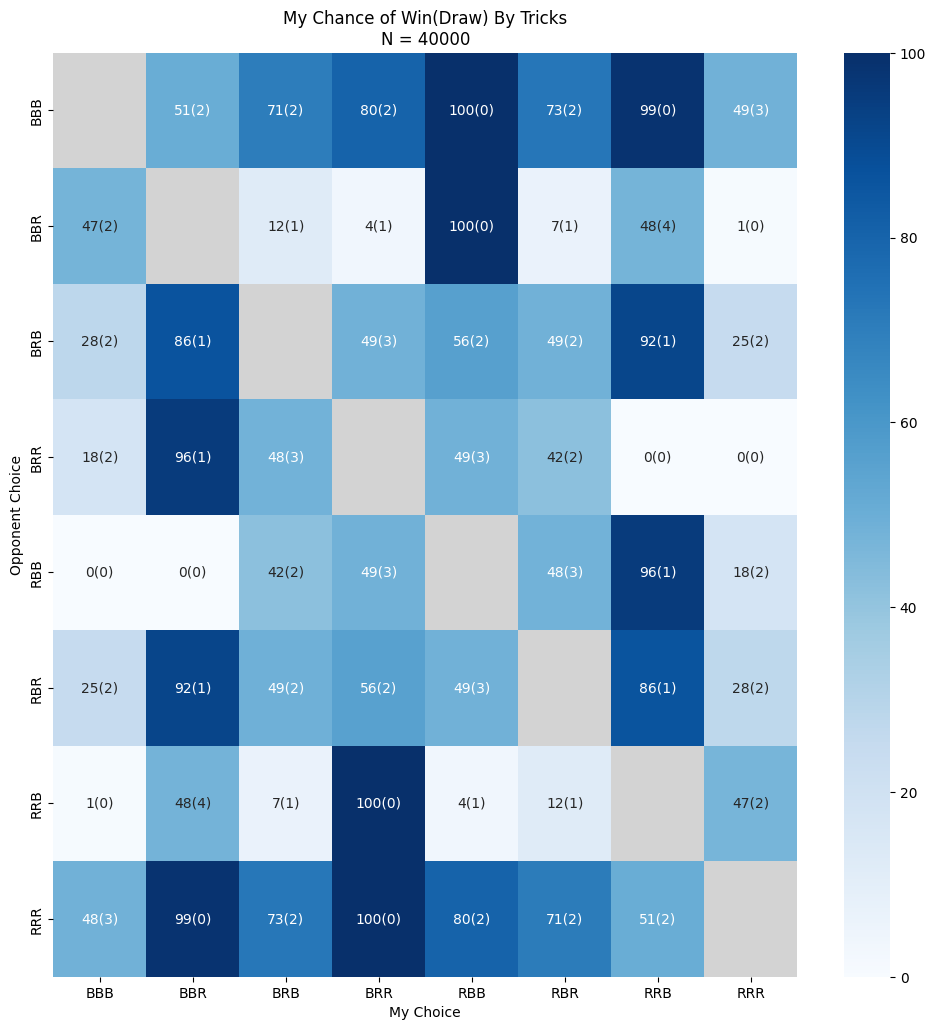

In [6]:
make_heatmap(res, parser=w)

In [7]:
res2 = w.add_decks(40000)

[['011', '111', array([79999,     0,     1])], ['011', '001', array([ 2817, 76521,   662])], ['011', '100', array([38814, 38938,  2248])], ['011', '000', array([64134, 14269,  1597])], ['011', '101', array([44465, 33749,  1786])], ['011', '110', array([79810,   153,    37])], ['011', '010', array([38824, 38802,  2374])], ['111', '011', array([    0, 79999,     1])], ['111', '001', array([  768, 79021,   211])], ['111', '100', array([14093, 64326,  1581])], ['111', '000', array([38700, 39015,  2285])], ['111', '101', array([22201, 56444,  1355])], ['111', '110', array([37786, 40588,  1626])], ['111', '010', array([20191, 58109,  1700])], ['001', '011', array([76521,  2817,   662])], ['001', '111', array([79021,   768,   211])], ['001', '100', array([  167, 79794,    39])], ['001', '000', array([40495, 37958,  1547])], ['001', '101', array([73453,  5438,  1109])], ['001', '110', array([38385, 38073,  3542])], ['001', '010', array([69091,  9881,  1028])], ['100', '011', array([38938, 3881

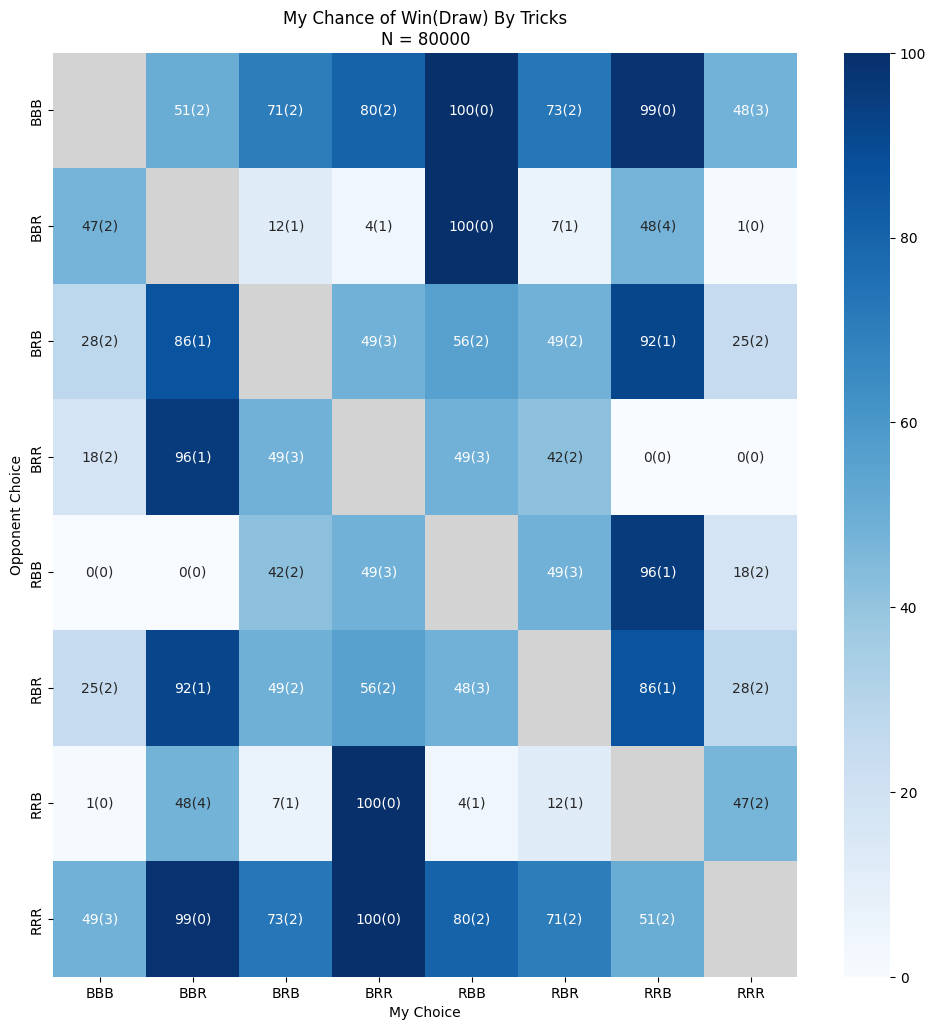

In [8]:
make_heatmap(res2, parser=w)

In [17]:
df = pd.DataFrame(res,columns=['p1choice','p2choice','result']).pivot(index='p1choice',columns='p2choice',values='result')

In [64]:
import src.scores
reload(src.scores)
from src.scores import ScoreTable

In [65]:
grid = ScoreTable(res)
grid.saveData('scoretest')

In [66]:
pd.read_csv('scores/scoretest.csv')

,p1choice,p2choice,value
0,0,0,--
1,1,0,[20207 18940 853]
2,10,0,[28189 11162 649]
3,11,0,[32124 7112 764]
4,100,0,[39998 1 1]
...,...,...,...
59,11,111,[39999 1 0]
60,100,111,[32020 7160 820]
61,101,111,[28356 10947 697]
62,110,111,[20391 18852 757]
